<a href="https://colab.research.google.com/github/nafl13/ICT_DSA/blob/Daily_tasks/Loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv('/content/drive/MyDrive/train_loan_preprocess.csv')

In [55]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [57]:
df.shape

(614, 13)

In [58]:
df.drop(columns=['Loan_ID'],inplace=True)

In [59]:
for col in df.columns:
  print(f'{col}: {df[col].nunique()}')


Gender: 2
Married: 2
Dependents: 4
Education: 2
Self_Employed: 2
ApplicantIncome: 505
CoapplicantIncome: 287
LoanAmount: 203
Loan_Amount_Term: 10
Credit_History: 2
Property_Area: 3
Loan_Status: 2


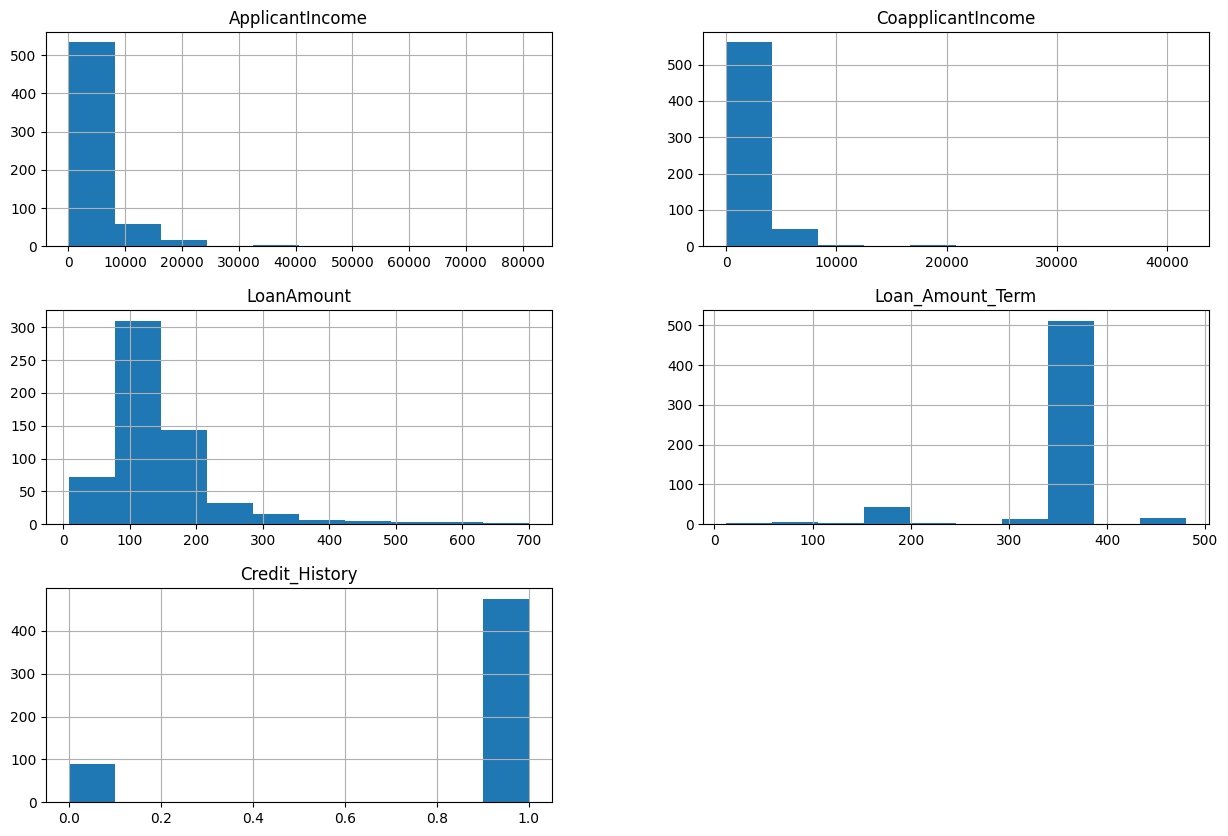

In [60]:
freqplot = df.select_dtypes(include = ['float','int'])
freqplot.hist(figsize = (15,10))
plt.show()

In [61]:
null_cols = df.columns[df.isnull().any()]
print(null_cols)

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [62]:
for col in ['Gender','Married','Self_Employed','Dependents','Credit_History']:
  df[col].fillna(df[col].mode()[0],inplace=True)


In [63]:
df.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,0


In [64]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

In [65]:
df.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [66]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  print(f'{col}: {df[col].unique()}')

Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Dependents: ['0' '1' '2' '3+']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


In [67]:
df1 = pd.get_dummies(df, columns=['Gender','Married','Education','Self_Employed'],dtype=int)
df1

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0,5849,0.0,128.0,360.0,1.0,Urban,Y,0,1,1,0,1,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,1,1,0,1,0
2,0,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1,0,1,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1,0,1,0,1,1,0
4,0,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,Rural,Y,1,0,1,0,1,0,1,0
610,3+,4106,0.0,40.0,180.0,1.0,Rural,Y,0,1,0,1,1,0,1,0
611,1,8072,240.0,253.0,360.0,1.0,Urban,Y,0,1,0,1,1,0,1,0
612,2,7583,0.0,187.0,360.0,1.0,Urban,Y,0,1,0,1,1,0,1,0


In [68]:
from sklearn.preprocessing import OrdinalEncoder
Dep_type = ['0', '1', '2', '3+']
oe = OrdinalEncoder(categories=[Dep_type])
df1['Dependents'] = oe.fit_transform(df[['Dependents']])
df1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0.0,5849,0.0,128.0,360.0,1.0,Urban,Y,0,1,1,0,1,0,1,0
1,1.0,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,1,1,0,1,0
2,0.0,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1,0,1,1,0,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1,0,1,0,1,1,0
4,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,1,0,1,0,1,0


In [69]:
prop_type = [ 'Rural', 'Semiurban','Urban']
oe = OrdinalEncoder(categories=[prop_type])
df1['Property_Area'] = oe.fit_transform(df[['Property_Area']])
df1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0.0,5849,0.0,128.0,360.0,1.0,2.0,Y,0,1,1,0,1,0,1,0
1,1.0,4583,1508.0,128.0,360.0,1.0,0.0,N,0,1,0,1,1,0,1,0
2,0.0,3000,0.0,66.0,360.0,1.0,2.0,Y,0,1,0,1,1,0,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,2.0,Y,0,1,0,1,0,1,1,0
4,0.0,6000,0.0,141.0,360.0,1.0,2.0,Y,0,1,1,0,1,0,1,0


In [70]:
loan_st = ['N','Y']
oe = OrdinalEncoder(categories=[loan_st])
df1['Loan_Status'] = oe.fit_transform(df[['Loan_Status']])
df1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0.0,5849,0.0,128.0,360.0,1.0,2.0,1.0,0,1,1,0,1,0,1,0
1,1.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0,0,1,0,1,1,0,1,0
2,0.0,3000,0.0,66.0,360.0,1.0,2.0,1.0,0,1,0,1,1,0,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0,0,1,0,1,0,1,1,0
4,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0,0,1,1,0,1,0,1,0


In [73]:
from sklearn.preprocessing import MinMaxScaler
for column in df1.columns:
    mms = MinMaxScaler()
    df1[column] = mms.fit_transform(df1[[column]])
df1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0.000000,0.070489,0.000000,0.172214,0.74359,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.333333,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.000000,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.000000,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.000000,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
